# Evaluation of the Results for unknown CPs with fixed window size m (number of values) #
Notebook from https://github.com/ermshaua/time-series-segmentation-benchmark/blob/main/tssb/notebooks/competitor_evaluation.ipynb. Slightly edited.

In [1]:
import numpy as np
import pandas as pd

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys
sys.path.append("../../")

import orange3score

Let's load the scores from the different methods.

In [2]:
df_scores = pd.read_csv("./_segmentation_covering_unknown_stumpy_m_fluss_ALL.csv")
df_scores

,dataset,flussOracle,fluss1,fluss2,fluss3,fluss4,fluss5,flussEnsSum,flussEnsMin
0,Adiac,0.477273,0.430398,0.477273,0.461648,0.437500,0.428977,0.302734,0.430398
1,ArrowHead,0.963479,0.994702,0.963479,0.763612,0.796813,0.798805,0.500000,0.994702
2,Beef,0.934085,0.935417,0.934085,0.768329,0.712773,0.659286,0.500000,0.939422
3,BeetleFly,0.959375,0.500000,0.500000,0.500000,0.665424,0.959375,0.500000,0.500000
4,BirdChicken,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
5,CBF,0.503430,0.256156,0.503430,0.256156,0.256156,0.256156,0.256156,0.256156
6,Car,0.745725,0.861173,0.643509,0.653317,0.745725,0.719172,0.342222,0.795798
7,Chinatown,1.000000,0.704167,0.391667,0.404167,0.566667,1.000000,1.000000,0.704167
8,ChlorineConcentration,0.577487,0.577487,0.577487,0.577487,0.577487,0.577487,0.577487,0.577487
9,CinCECGTorso,0.337149,0.337149,0.337149,0.337149,0.337149,0.337149,0.337149,0.337149


Let's calculate the mean/median/std error.

In [3]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].mean() * 100, 2)}")

flussOracle: mean_error=60.23
fluss1: mean_error=53.45
fluss2: mean_error=54.6
fluss3: mean_error=52.94
fluss4: mean_error=52.8
fluss5: mean_error=51.66
flussEnsSum: mean_error=40.5
flussEnsMin: mean_error=53.16


In [4]:
for name in df_scores.columns[1:]:
    print(f"{name}: median_error={np.round(df_scores[name].median() * 100, 2)}")

flussOracle: median_error=58.0
fluss1: median_error=50.1
fluss2: median_error=50.34
fluss3: median_error=50.1
fluss4: median_error=50.01
fluss5: median_error=50.0
flussEnsSum: median_error=34.22
flussEnsMin: median_error=50.1


In [5]:
for name in df_scores.columns[1:]:
    print(f"{name}: std_error={np.round(df_scores[name].std() * 100, 2)}")

flussOracle: std_error=27.2
fluss1: std_error=24.84
fluss2: std_error=25.55
fluss3: std_error=25.26
fluss4: std_error=26.07
fluss5: std_error=26.47
flussEnsSum: std_error=23.05
flussEnsMin: std_error=24.55


Let's compute the wins per method.

In [6]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

/tmp/ipykernel_43673/3065857076.py:1: FutureWarning: Dropping of nuisance columns in DataFrame.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  ranks = df_scores.rank(1, method = 'min', ascending=False)


In [7]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

flussOracle:wins=57 rank=1.5
fluss1:wins=44 rank=2.4
fluss2:wins=40 rank=2.8
fluss3:wins=33 rank=2.9
fluss4:wins=32 rank=3.0
fluss5:wins=33 rank=3.3
flussEnsSum:wins=30 rank=4.3
flussEnsMin:wins=42 rank=2.5


Let's plot and output the ranks.

In [8]:
cd = orange3score.compute_CD(means, df_scores.shape[0])
orange3score.graph_ranks(avranks=means, names=df_scores.columns[1:], cd=cd, width=5, reverse=True, textspace=1.2, filename="./ranks_unknown_fixed_m.png")

In [9]:
for name, rank in zip(df_scores.columns[1:], means):
    print(f"{name}: rank={np.round(rank, 5)}")

flussOracle: rank=1.46667
fluss1: rank=2.41333
fluss2: rank=2.8
fluss3: rank=2.90667
fluss4: rank=3.02667
fluss5: rank=3.34667
flussEnsSum: rank=4.28
flussEnsMin: rank=2.46667


Let's compute wins/losses against the best-ranking algorithm ClaSP.

In [10]:
# for rival in df_scores.columns[1:]:
#     if rival == "ClaSP": continue
    
#     df_pair = df_scores[["ClaSP", rival]]
#     pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
#     wins = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 2)].shape[0]
#     losses = pair_ranks[(pair_ranks["ClaSP"] == 2) & (pair_ranks[rival] == 1)].shape[0]
#     ties = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
#     assert wins + losses + ties == pair_ranks.shape[0]
    
#     print(f"ClaSP vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

Let's compute wins/losses against the stumpy fluss algorithm (no dilation).

In [11]:
for rival in df_scores.columns[1:]:
    if rival == "fluss1": continue
    
    df_pair = df_scores[["fluss1", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks["fluss1"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["fluss1"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["fluss1"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"fluss1 vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

fluss1 vs flussOracle: (wins/losses/ties): 29/17/29
fluss1 vs fluss2: (wins/losses/ties): 18/25/32
fluss1 vs fluss3: (wins/losses/ties): 19/24/32
fluss1 vs fluss4: (wins/losses/ties): 20/26/29
fluss1 vs fluss5: (wins/losses/ties): 16/27/32
fluss1 vs flussEnsSum: (wins/losses/ties): 2/34/39
fluss1 vs flussEnsMin: (wins/losses/ties): 2/4/69


/tmp/ipykernel_43673/1160824554.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/tmp/ipykernel_43673/1160824554.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


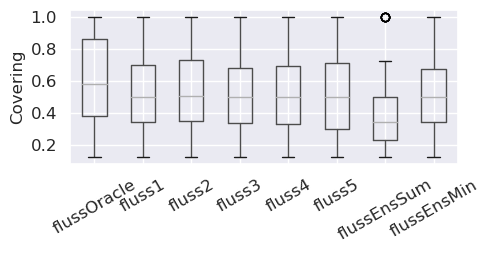

In [12]:
fontsize = 12
_, ax = plt.subplots(figsize=(5,2))

df_scores.boxplot(ax=ax, rot=30)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"./boxplot_unknown_fixed_m.png", bbox_inches="tight")